In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [45]:
df_train = pd.read_csv('./dataset/train.csv',na_values=['xxxxxxxx','Unknown','?',-999])

In [3]:
df_train

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,NaN,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,NaN,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,NaN,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,4
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,NaN,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,5
36989,fffe4300490044003500330034003100,Luciana Kinch,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,4
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,NaN,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,3


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36933 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       31554 non-null  object 
 9   referral_id                   19146 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           31599 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
for column in df_train.columns[2:]:
    print('\n',column,':\n',df_train[column].unique())


 age :
 [18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]

 gender :
 ['F' 'M' nan]

 security_no :
 ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']

 region_category :
 ['Village' 'City' 'Town' nan]

 membership_category :
 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

 joining_date :
 ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']

 joined_through_referral :
 ['No' nan 'Yes']

 referral_id :
 [nan 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']

 preferred_offer_types :
 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]

 medium_of_operation :
 [nan 'Desktop' 'Smartphone' 'Both']

 internet_option :
 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']

 last_visit_time :
 ['16:08:02' '12:38:13' '22:53:21' ... '04:14:

In [37]:
df_train.avg_time_spent[df_train.avg_time_spent<0].count()

1719

In [38]:
df_train.days_since_last_login[df_train.days_since_last_login<0].count()

0

In [46]:
df_train.avg_frequency_login_days = pd.to_numeric(df_train.avg_frequency_login_days,errors='coerce')

In [47]:
df_train.avg_frequency_login_days[df_train.avg_frequency_login_days<0].count()

683

In [41]:
for column in df_train.columns[2:]:
    print('\n',column,':\n',df_train[column].isna().sum())


 age :
 0

 gender :
 59

 security_no :
 0

 region_category :
 5428

 membership_category :
 0

 joining_date :
 0

 joined_through_referral :
 5438

 referral_id :
 17846

 preferred_offer_types :
 288

 medium_of_operation :
 5393

 internet_option :
 0

 last_visit_time :
 0

 days_since_last_login :
 1999

 avg_time_spent :
 0

 avg_transaction_value :
 0

 avg_frequency_login_days :
 3522

 points_in_wallet :
 3443

 used_special_discount :
 0

 offer_application_preference :
 0

 past_complaint :
 0

 complaint_status :
 0

 feedback :
 0

 churn_risk_score :
 0


In [48]:
df_train.churn_risk_score = df_train.churn_risk_score.replace(-1,5)

In [55]:
df_train.churn_risk_score.unique()

array([2, 1, 5, 3, 4])

In [60]:
df_train.churn_risk_score[df_train.churn_risk_score==1].count()

2652

In [83]:
df_train.medium_of_operation[df_train.medium_of_operation=='Both'].count()

3810

In [84]:
df_train.medium_of_operation = df_train.medium_of_operation.fillna(value='Both')

In [85]:
df_train.medium_of_operation

0              Both
1           Desktop
2           Desktop
3           Desktop
4        Smartphone
            ...    
36987       Desktop
36988    Smartphone
36989       Desktop
36990    Smartphone
36991       Desktop
Name: medium_of_operation, Length: 36992, dtype: object

In [86]:
df_train.medium_of_operation[df_train.medium_of_operation=='Both'].count()

9203

In [87]:
for column in df_train.columns[2:]:
    print('\n',column,':\n',df_train[column].isna().sum())


 age :
 0

 gender :
 59

 security_no :
 0

 region_category :
 5428

 membership_category :
 0

 joining_date :
 0

 joined_through_referral :
 5438

 referral_id :
 17846

 preferred_offer_types :
 288

 medium_of_operation :
 0

 internet_option :
 0

 last_visit_time :
 0

 days_since_last_login :
 1999

 avg_time_spent :
 0

 avg_transaction_value :
 0

 avg_frequency_login_days :
 3522

 points_in_wallet :
 3443

 used_special_discount :
 0

 offer_application_preference :
 0

 past_complaint :
 0

 complaint_status :
 0

 feedback :
 0

 churn_risk_score :
 0


In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       31554 non-null  object 
 9   referral_id                   19146 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [91]:
df_train.avg_transaction_value[df_train.avg_transaction_value>0].count()

36992

In [96]:
df_train.gender = df_train.gender.fillna('F')

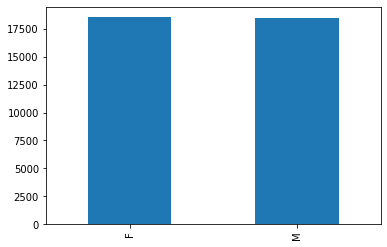

In [104]:
df_train.gender.value_counts().plot(kind='bar')
plt.show()

In [108]:
df_train.region_category[df_train.region_category=='City'].count()

12737

In [110]:
df_train.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
age,1.000000,-0.002017,0.001531,-0.000473,-0.002156,0.000205,0.002160
days_since_last_login,-0.002017,1.000000,-0.090335,-0.017037,0.019261,0.000364,0.031233
avg_time_spent,0.001531,-0.090335,1.000000,0.020888,0.001820,-0.000648,-0.023871
avg_transaction_value,-0.000473,-0.017037,0.020888,1.000000,-0.132256,0.087950,-0.352300
avg_frequency_login_days,-0.002156,0.019261,0.001820,-0.132256,1.000000,-0.047645,0.204009
points_in_wallet,0.000205,0.000364,-0.000648,0.087950,-0.047645,1.000000,-0.314836
churn_risk_score,0.002160,0.031233,-0.023871,-0.352300,0.204009,-0.314836,1.000000


In [111]:
df_train.isna().sum()

customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                  5428
membership_category                 0
joining_date                        0
joined_through_referral          5438
referral_id                     17846
preferred_offer_types             288
medium_of_operation                 0
internet_option                     0
last_visit_time                     0
days_since_last_login            1999
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days         3522
points_in_wallet                 3443
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                    0
dtype: int64

In [121]:
df_train.avg_time_spent = abs(df_train.avg_time_spent)

In [122]:
df_train.avg_time_spent[df_train.avg_time_spent<0].count()

0

In [115]:
df_train.avg_transaction_value[df_train.avg_transaction_value<0].count()

0

In [127]:
df_train.avg_frequency_login_days[df_train.avg_frequency_login_days<0].count()

683

In [128]:
df_train.avg_frequency_login_days = abs(df_train.avg_frequency_login_days)

In [131]:
df_train.avg_frequency_login_days[df_train.avg_frequency_login_days<0].count()

0

In [132]:
for column in df_train.columns[2:]:
    print('\n',column,':\n',df_train[column].unique())


 age :
 [18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]

 gender :
 ['F' 'M']

 security_no :
 ['XW0DQ7H' '5K0N3X1' '1F2TCL3' ... 'XK1IM9H' 'K6VTP1Z' 'LBX0GLR']

 region_category :
 ['Village' 'City' 'Town' nan]

 membership_category :
 ['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']

 joining_date :
 ['2017-08-17' '2017-08-28' '2016-11-11' ... '2017-12-11' '2016-09-25'
 '2017-04-15']

 joined_through_referral :
 ['No' nan 'Yes']

 referral_id :
 [nan 'CID21329' 'CID12313' ... 'CID60808' 'CID10431' 'CID45477']

 preferred_offer_types :
 ['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]

 medium_of_operation :
 ['Both' 'Desktop' 'Smartphone']

 internet_option :
 ['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']

 last_visit_time :
 ['16:08:02' '12:38:13' '22:53:21' ... '04:14:05' '09:

In [50]:
for col in ['region_category','joined_through_referral','preferred_offer_types','days_since_last_login','avg_frequency_login_days','points_in_wallet']:
    print('\n',col,': ',df_train[col].isna().sum())
    print('\n',df_train[col].dtype)


 region_category :  5428

 object

 joined_through_referral :  5438

 object

 preferred_offer_types :  288

 object

 days_since_last_login :  1999

 float64

 avg_frequency_login_days :  3522

 float64

 points_in_wallet :  3443

 float64


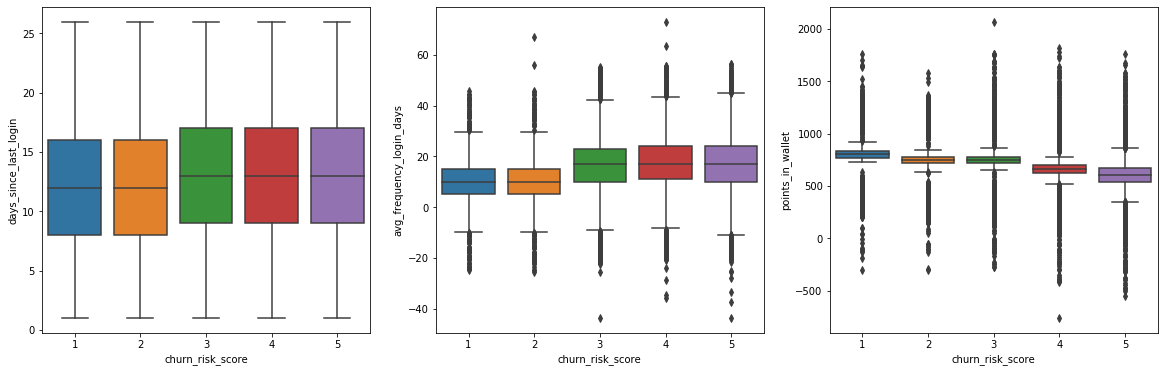

In [51]:
plt.figure(figsize = (20,6))
plt.subplot(131)
sns.boxplot(data = df_train, x = 'churn_risk_score', y = 'days_since_last_login')
plt.subplot(132)
sns.boxplot(data = df_train, x = 'churn_risk_score', y = 'avg_frequency_login_days')
plt.subplot(133)
sns.boxplot(data = df_train, x = 'churn_risk_score', y = 'points_in_wallet')

In [17]:
df_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'referral_id', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'last_visit_time',
       'days_since_last_login', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [52]:
for col in ['region_category','joined_through_referral','preferred_offer_types','days_since_last_login','avg_frequency_login_days','points_in_wallet']:
    if df_train[col].dtype == 'float64':
        df_train[col] = df_train[col].fillna(df_train[col].mean())
    else:
        df_train[col] = df_train[col].fillna(method='ffill') 

In [55]:
df_train.isna().sum()

customer_id                         0
Name                                0
age                                 0
gender                              0
security_no                         0
region_category                     0
membership_category                 0
joining_date                        0
joined_through_referral             0
referral_id                     17846
preferred_offer_types               0
medium_of_operation                 0
internet_option                     0
last_visit_time                     0
days_since_last_login               0
avg_time_spent                      0
avg_transaction_value               0
avg_frequency_login_days            0
points_in_wallet                    0
used_special_discount               0
offer_application_preference        0
past_complaint                      0
complaint_status                    0
feedback                            0
churn_risk_score                    0
dtype: int64

In [58]:
df_train.joining_date

0        2017-08-17
1        2017-08-28
2        2016-11-11
3        2016-10-29
4        2017-09-12
            ...    
36987    2017-09-21
36988    2016-06-27
36989    2016-09-11
36990    2017-06-15
36991    2015-10-23
Name: joining_date, Length: 36992, dtype: object

In [61]:
pd.to_datetime(df_train.joining_date)

0       2017-08-17
1       2017-08-28
2       2016-11-11
3       2016-10-29
4       2017-09-12
           ...    
36987   2017-09-21
36988   2016-06-27
36989   2016-09-11
36990   2017-06-15
36991   2015-10-23
Name: joining_date, Length: 36992, dtype: datetime64[ns]

In [59]:
pd.to_datetime

In [ ]:
df_train.joining_date = pd.to_datetime(df_train.joining_date)
df_train['joining_year'] = df_train.joining_date.dt.year

In [10]:
df_train.joining_year

0        2017
1        2017
2        2016
3        2016
4        2017
         ... 
36987    2017
36988    2016
36989    2016
36990    2017
36991    2015
Name: joining_year, Length: 36992, dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   customer_id                   36992 non-null  object        
 1   Name                          36992 non-null  object        
 2   age                           36992 non-null  int64         
 3   gender                        36992 non-null  object        
 4   security_no                   36992 non-null  object        
 5   region_category               36992 non-null  object        
 6   membership_category           36992 non-null  object        
 7   joining_date                  36992 non-null  datetime64[ns]
 8   joined_through_referral       36992 non-null  object        
 9   referral_id                   19146 non-null  object        
 10  preferred_offer_types         36992 non-null  object        
 11  medium_of_operation         

In [25]:
df_train.corr()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_year
age,1.000000,-0.001961,-0.000720,-0.000473,-0.000359,0.000196,0.002160,-0.012752
days_since_last_login,-0.001961,1.000000,-0.100361,-0.016567,0.014943,0.000335,0.030453,-0.003585
avg_time_spent,-0.000720,-0.100361,1.000000,0.019383,0.000840,-0.004856,-0.021831,-0.000148
avg_transaction_value,-0.000473,-0.016567,0.019383,1.000000,-0.130918,0.083729,-0.352300,-0.000702
avg_frequency_login_days,-0.000359,0.014943,0.000840,-0.130918,1.000000,-0.045099,0.206386,-0.003373
points_in_wallet,0.000196,0.000335,-0.004856,0.083729,-0.045099,1.000000,-0.299573,0.002848
churn_risk_score,0.002160,0.030453,-0.021831,-0.352300,0.206386,-0.299573,1.000000,0.006095
joining_year,-0.012752,-0.003585,-0.000148,-0.000702,-0.003373,0.002848,0.006095,1.000000


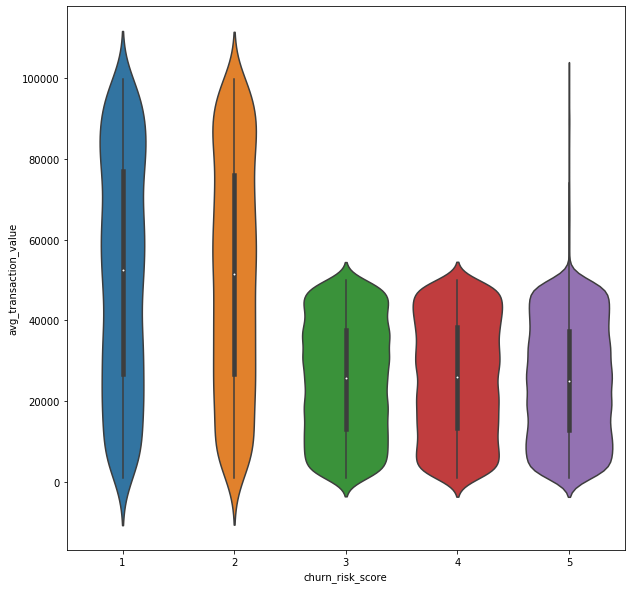

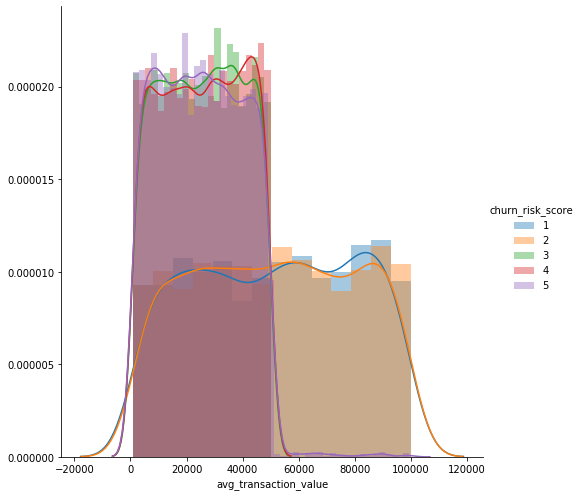

In [15]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'avg_transaction_value')
sns.FacetGrid(df_train, hue = 'churn_risk_score', height = 7)\
    .map(sns.distplot, 'avg_transaction_value')\
    .add_legend()
plt.show()

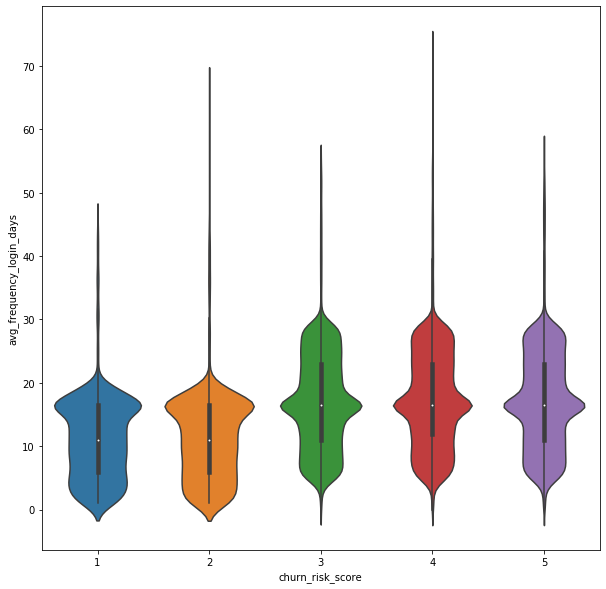

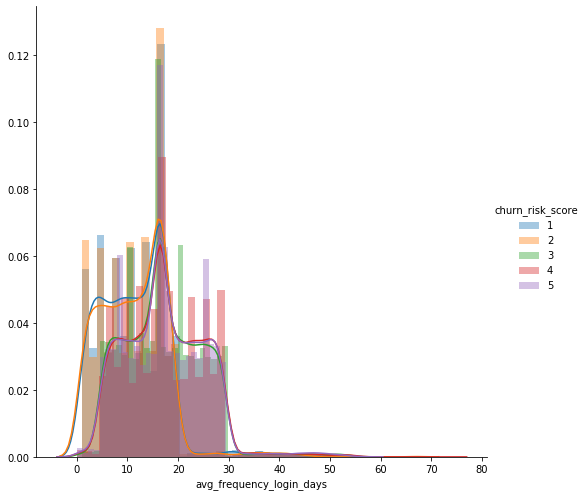

In [20]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'avg_frequency_login_days')
sns.FacetGrid(df_train, hue = 'churn_risk_score', height = 7)\
    .map(sns.distplot, 'avg_frequency_login_days')\
    .add_legend()
plt.show()

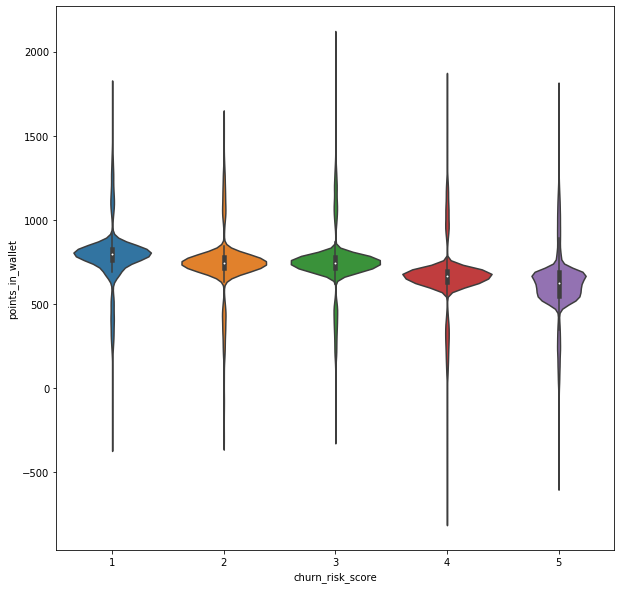

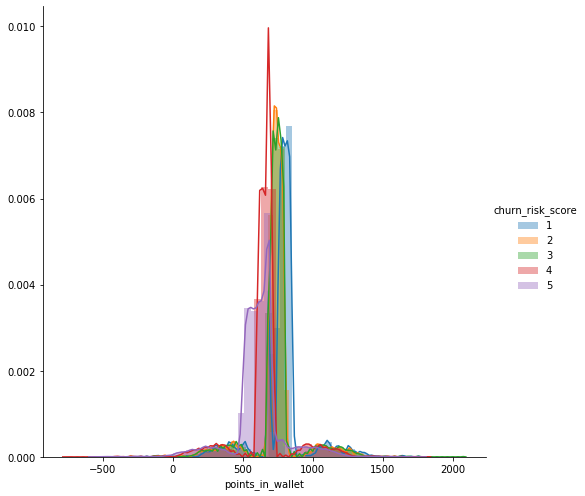

In [21]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'points_in_wallet')
sns.FacetGrid(df_train, hue = 'churn_risk_score', height = 7)\
    .map(sns.distplot, 'points_in_wallet')\
    .add_legend()
plt.show()

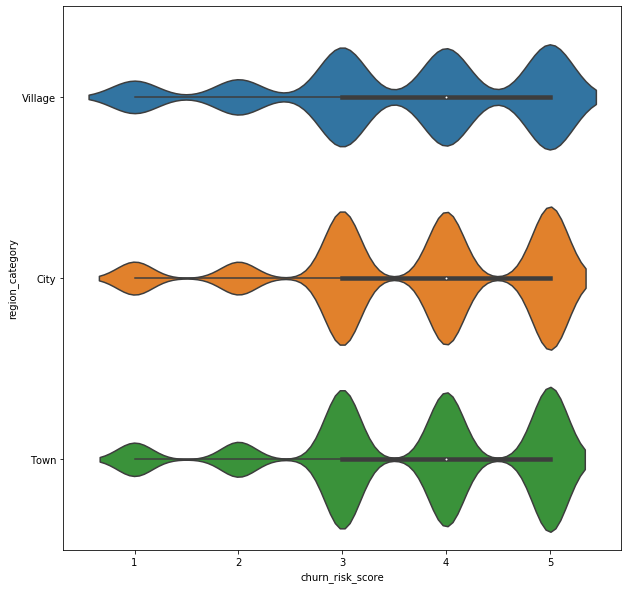

In [29]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'region_category')

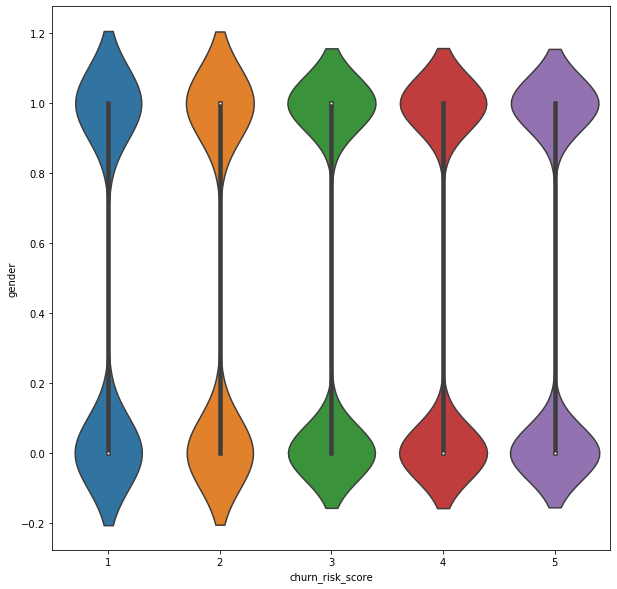

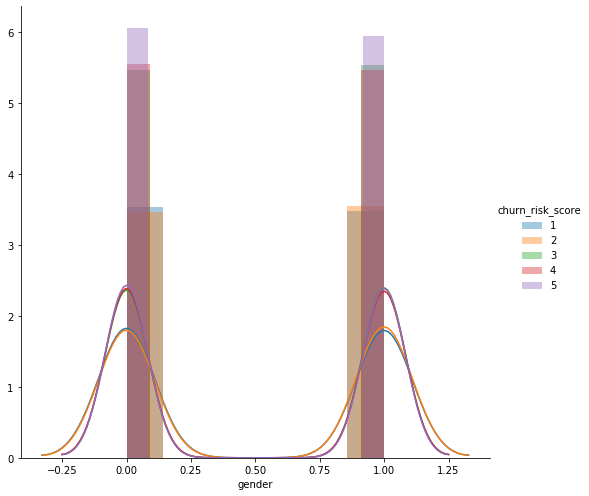

In [22]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'gender')
sns.FacetGrid(df_train, hue = 'churn_risk_score', height = 7)\
    .map(sns.distplot, 'gender')\
    .add_legend()
plt.show()
#plt.hist(df_train.region_category)

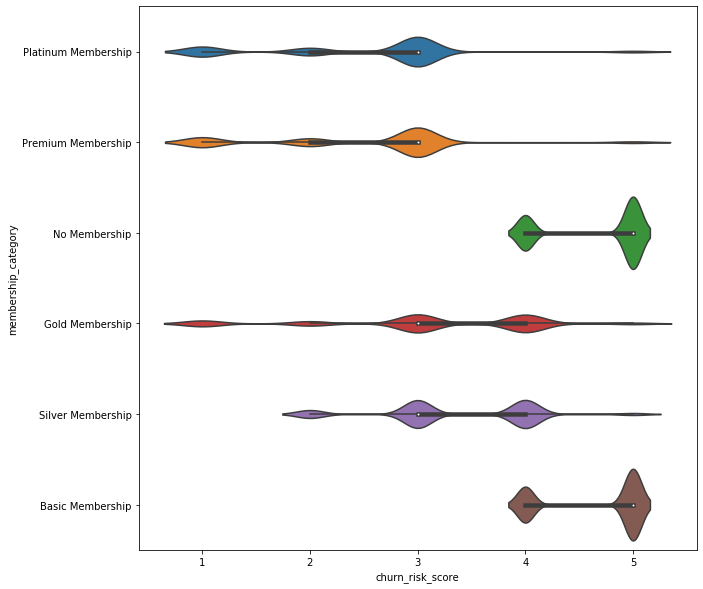

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'membership_category')

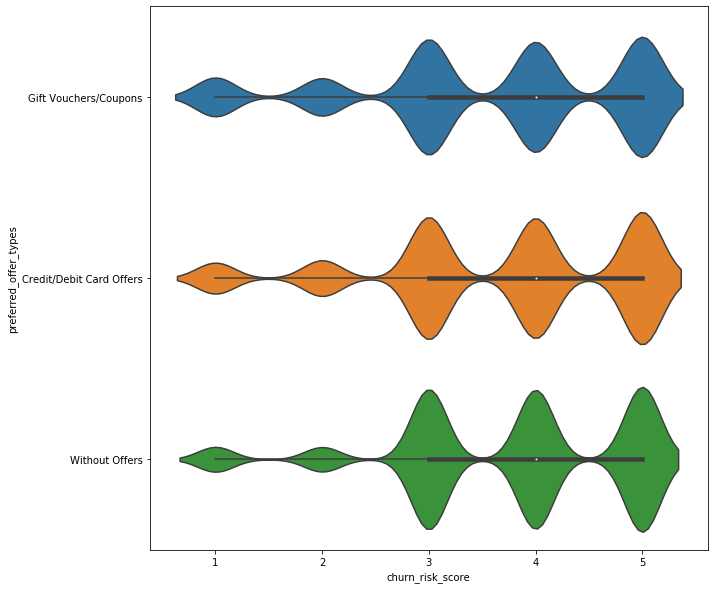

In [31]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'preferred_offer_types')

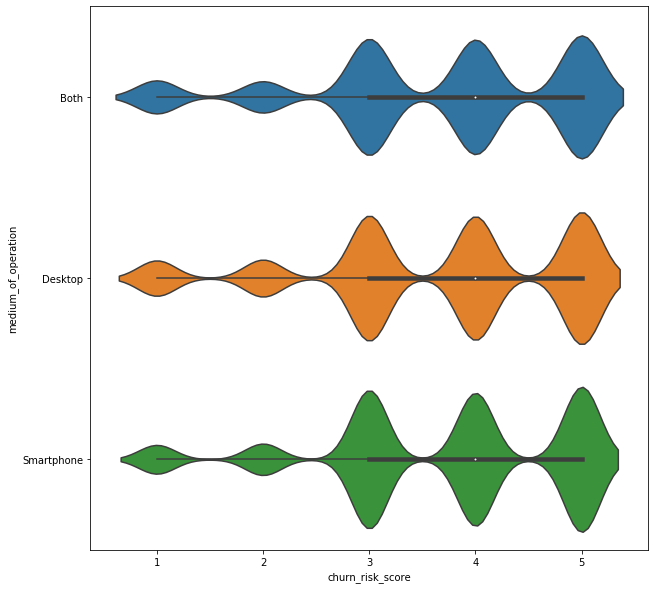

In [32]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'medium_of_operation')

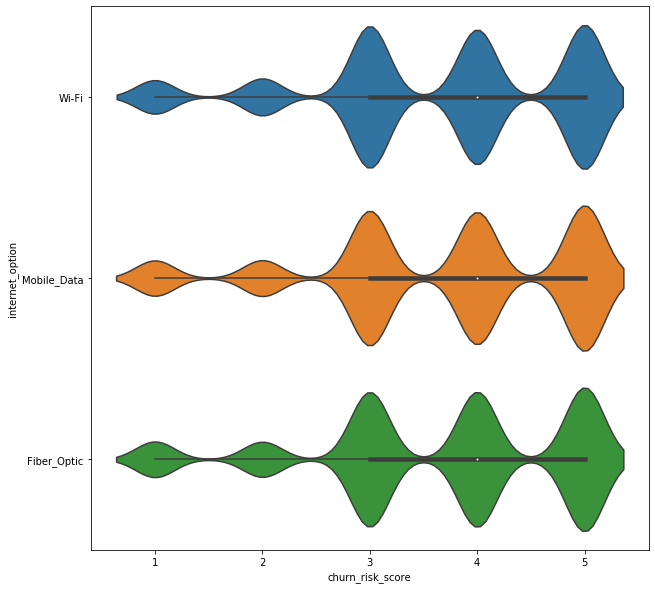

In [33]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'internet_option')

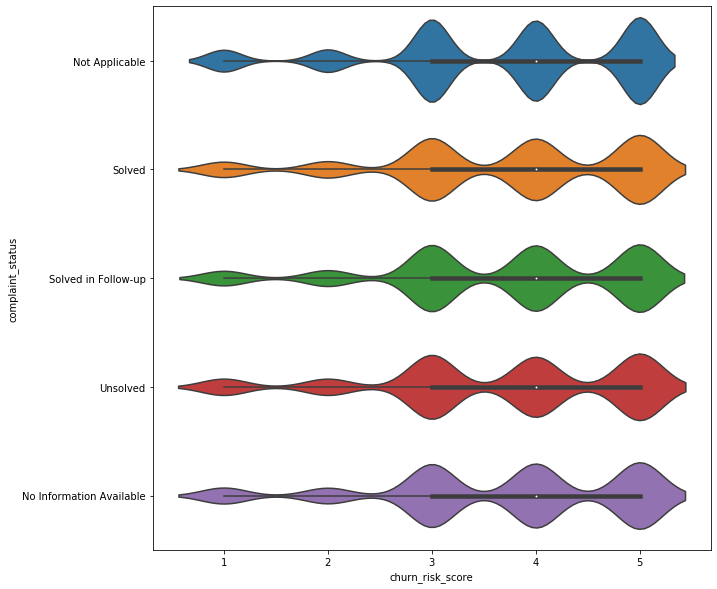

In [34]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'complaint_status')

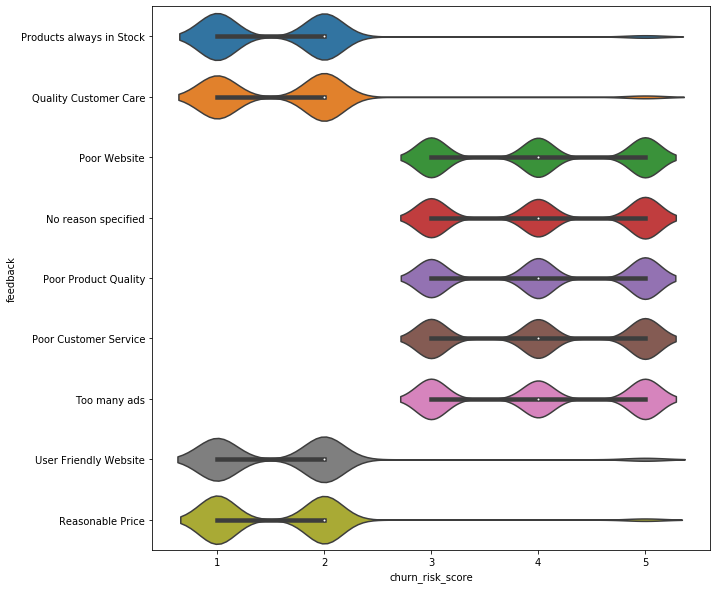

In [35]:
plt.figure(figsize=(10,10))
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'feedback')

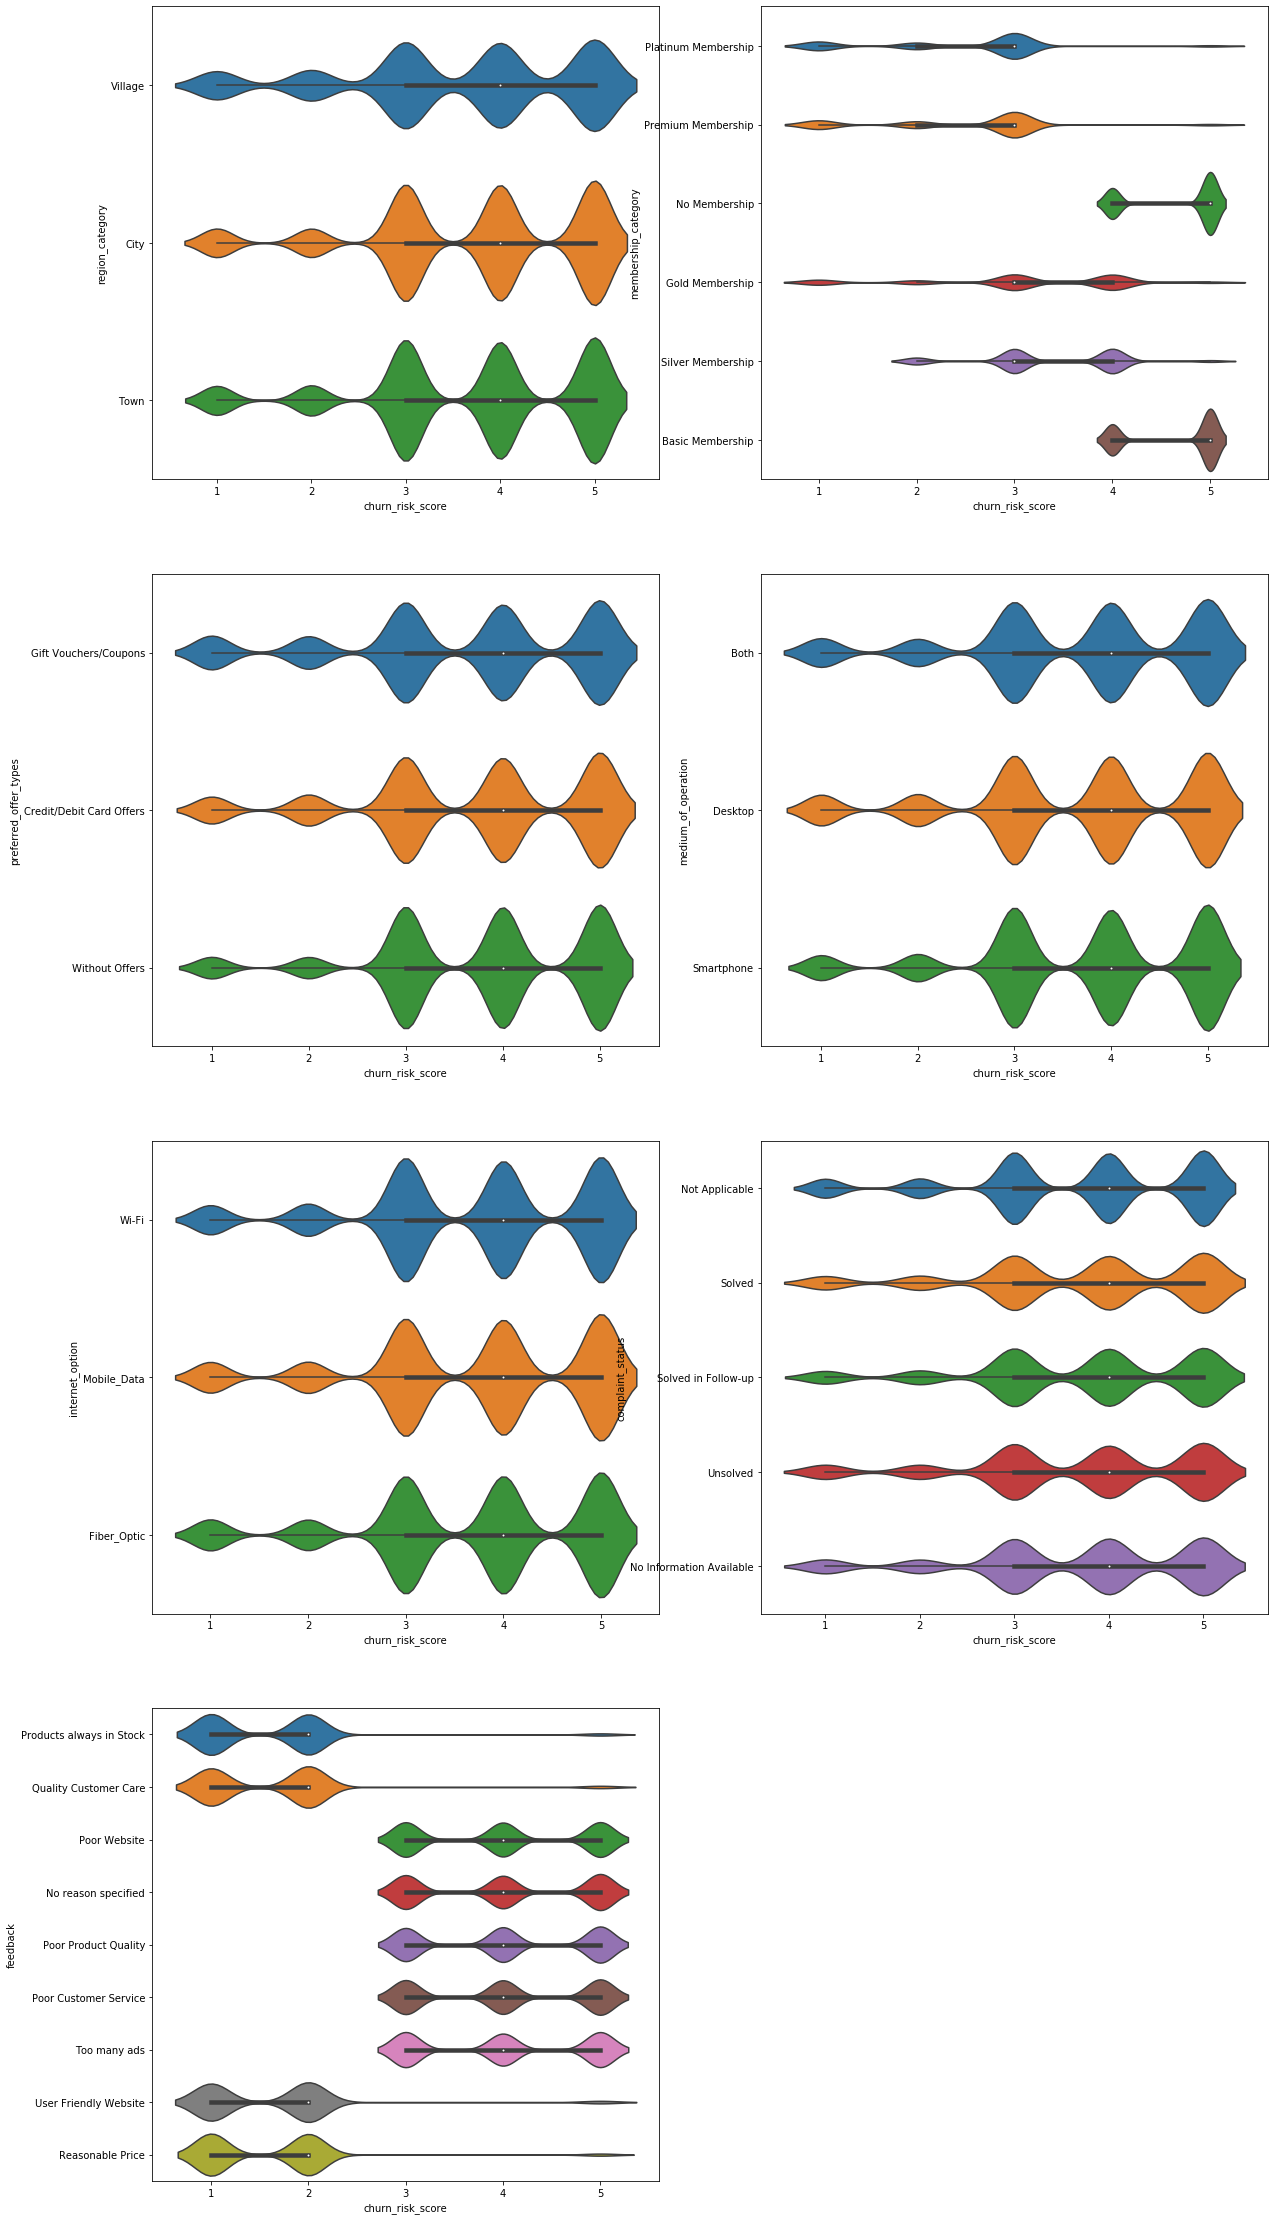

In [36]:
plt.figure(figsize=(20,40))
plt.subplot(4,2,1)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'region_category')
plt.subplot(4,2,2)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'membership_category')
plt.subplot(4,2,3)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'preferred_offer_types')
plt.subplot(4,2,4)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'medium_of_operation')
plt.subplot(4,2,5)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'internet_option')
plt.subplot(4,2,6)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'complaint_status')
plt.subplot(4,2,7)
sns.violinplot(data = df_train, x = 'churn_risk_score', y = 'feedback')

In [9]:
df_train.corr()

,age,gender,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,joining_year
age,1.000000,0.000469,-0.001961,-0.000720,-0.000473,-0.000359,0.000196,0.002160,-0.012752
gender,0.000469,1.000000,-0.003581,-0.006865,0.003887,-0.001765,-0.009599,-0.004682,0.003421
days_since_last_login,-0.001961,-0.003581,1.000000,-0.100361,-0.016567,0.014943,0.000335,0.030453,-0.003585
avg_time_spent,-0.000720,-0.006865,-0.100361,1.000000,0.019383,0.000840,-0.004856,-0.021831,-0.000148
avg_transaction_value,-0.000473,0.003887,-0.016567,0.019383,1.000000,-0.130918,0.083729,-0.352300,-0.000702
avg_frequency_login_days,-0.000359,-0.001765,0.014943,0.000840,-0.130918,1.000000,-0.045099,0.206386,-0.003373
points_in_wallet,0.000196,-0.009599,0.000335,-0.004856,0.083729,-0.045099,1.000000,-0.299573,0.002848
churn_risk_score,0.002160,-0.004682,0.030453,-0.021831,-0.352300,0.206386,-0.299573,1.000000,0.006095
joining_year,-0.012752,0.003421,-0.003585,-0.000148,-0.000702,-0.003373,0.002848,0.006095,1.000000


In [6]:
le = preprocessing.LabelEncoder()
df_train.gender = le.fit_transform(df_train.gender)
df_train.gender

0        0
1        0
2        0
3        1
4        0
        ..
36987    0
36988    0
36989    0
36990    1
36991    1
Name: gender, Length: 36992, dtype: int64

In [2]:
df_train.used_special_discount = le.fit_transform(df_train.used_special_discount)
df_train.offer_application_preference = le.fit_transform(df_train.offer_application_preference)
df_train.past_complaint = le.fit_transform(df_train.past_complaint)
df_train.joined_through_referral = le.fit_transform(df_train.joined_through_referral)

In [3]:
df_train.age

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_year
0,fffe4300490044003600300030003800,Pattie Morrisey,18,0,XW0DQ7H,Village,Platinum Membership,2017-08-17,0,NaN,...,53005.25,17.000000,781.750000,1,1,0,Not Applicable,Products always in Stock,2,2017
1,fffe43004900440032003100300035003700,Traci Peery,32,0,5K0N3X1,City,Premium Membership,2017-08-28,0,CID21329,...,12838.38,10.000000,686.882199,1,0,1,Solved,Quality Customer Care,1,2017
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,0,1F2TCL3,Town,No Membership,2016-11-11,1,CID12313,...,21027.00,22.000000,500.690000,0,1,1,Solved in Follow-up,Poor Website,5,2016
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,1,VJGJ33N,City,No Membership,2016-10-29,1,CID3793,...,25239.56,6.000000,567.660000,0,1,1,Unsolved,Poor Website,5,2016
4,fffe43004900440031003900350030003600,Meghan Kosak,31,0,SVZXCWB,City,No Membership,2017-09-12,0,NaN,...,24483.66,16.000000,663.060000,0,1,1,Solved,Poor Website,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,Cuc Tarr,46,0,6F51HFO,Town,Basic Membership,2017-09-21,0,NaN,...,27277.68,6.000000,639.510000,0,1,1,No Information Available,No reason specified,4,2017
36988,fffe43004900440033003500380036003600,Jenni Stronach,29,0,21KSM8Y,Town,Basic Membership,2016-06-27,0,NaN,...,11069.71,28.000000,527.990000,1,0,0,Not Applicable,Poor Customer Service,5,2016
36989,fffe4300490044003500330034003100,Luciana Kinch,23,0,XK1IM9H,Town,Basic Membership,2016-09-11,1,CID3838,...,38127.56,16.425529,680.470000,0,1,1,Unsolved,Poor Website,4,2016
36990,fffe43004900440031003200390039003000,Tawana Ardoin,53,1,K6VTP1Z,Village,Platinum Membership,2017-06-15,0,NaN,...,2378.86,20.000000,197.264414,1,1,0,Not Applicable,No reason specified,3,2017


In [38]:
type(df_train.age)

pandas.core.series.Series

In [26]:
df_train.corr()

,age,gender,joined_through_referral,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,churn_risk_score,joining_year
age,1.000000,0.000469,0.001147,-0.001961,-0.000720,-0.000473,-0.000359,0.000196,-0.005375,0.003090,0.001663,0.002160,-0.012752
gender,0.000469,1.000000,-0.004492,-0.003581,-0.006865,0.003887,-0.001765,-0.009599,-0.000202,-0.000186,-0.008397,-0.004682,0.003421
joined_through_referral,0.001147,-0.004492,1.000000,-0.033406,0.127740,-0.025900,0.021164,-0.009398,0.018290,0.019286,-0.000008,0.051414,-0.000154
days_since_last_login,-0.001961,-0.003581,-0.033406,1.000000,-0.100361,-0.016567,0.014943,0.000335,-0.021164,-0.016329,0.007281,0.030453,-0.003585
avg_time_spent,-0.000720,-0.006865,0.127740,-0.100361,1.000000,0.019383,0.000840,-0.004856,0.080398,0.068730,0.001837,-0.021831,-0.000148
avg_transaction_value,-0.000473,0.003887,-0.025900,-0.016567,0.019383,1.000000,-0.130918,0.083729,0.006703,0.023522,-0.003486,-0.352300,-0.000702
avg_frequency_login_days,-0.000359,-0.001765,0.021164,0.014943,0.000840,-0.130918,1.000000,-0.045099,-0.003708,-0.007274,0.011692,0.206386,-0.003373
points_in_wallet,0.000196,-0.009599,-0.009398,0.000335,-0.004856,0.083729,-0.045099,1.000000,0.004942,0.003944,-0.004501,-0.299573,0.002848
used_special_discount,-0.005375,-0.000202,0.018290,-0.021164,0.080398,0.006703,-0.003708,0.004942,1.000000,-0.814132,0.007421,-0.011559,0.000157
offer_application_preference,0.003090,-0.000186,0.019286,-0.016329,0.068730,0.023522,-0.007274,0.003944,-0.814132,1.000000,-0.007223,-0.033345,-0.001677


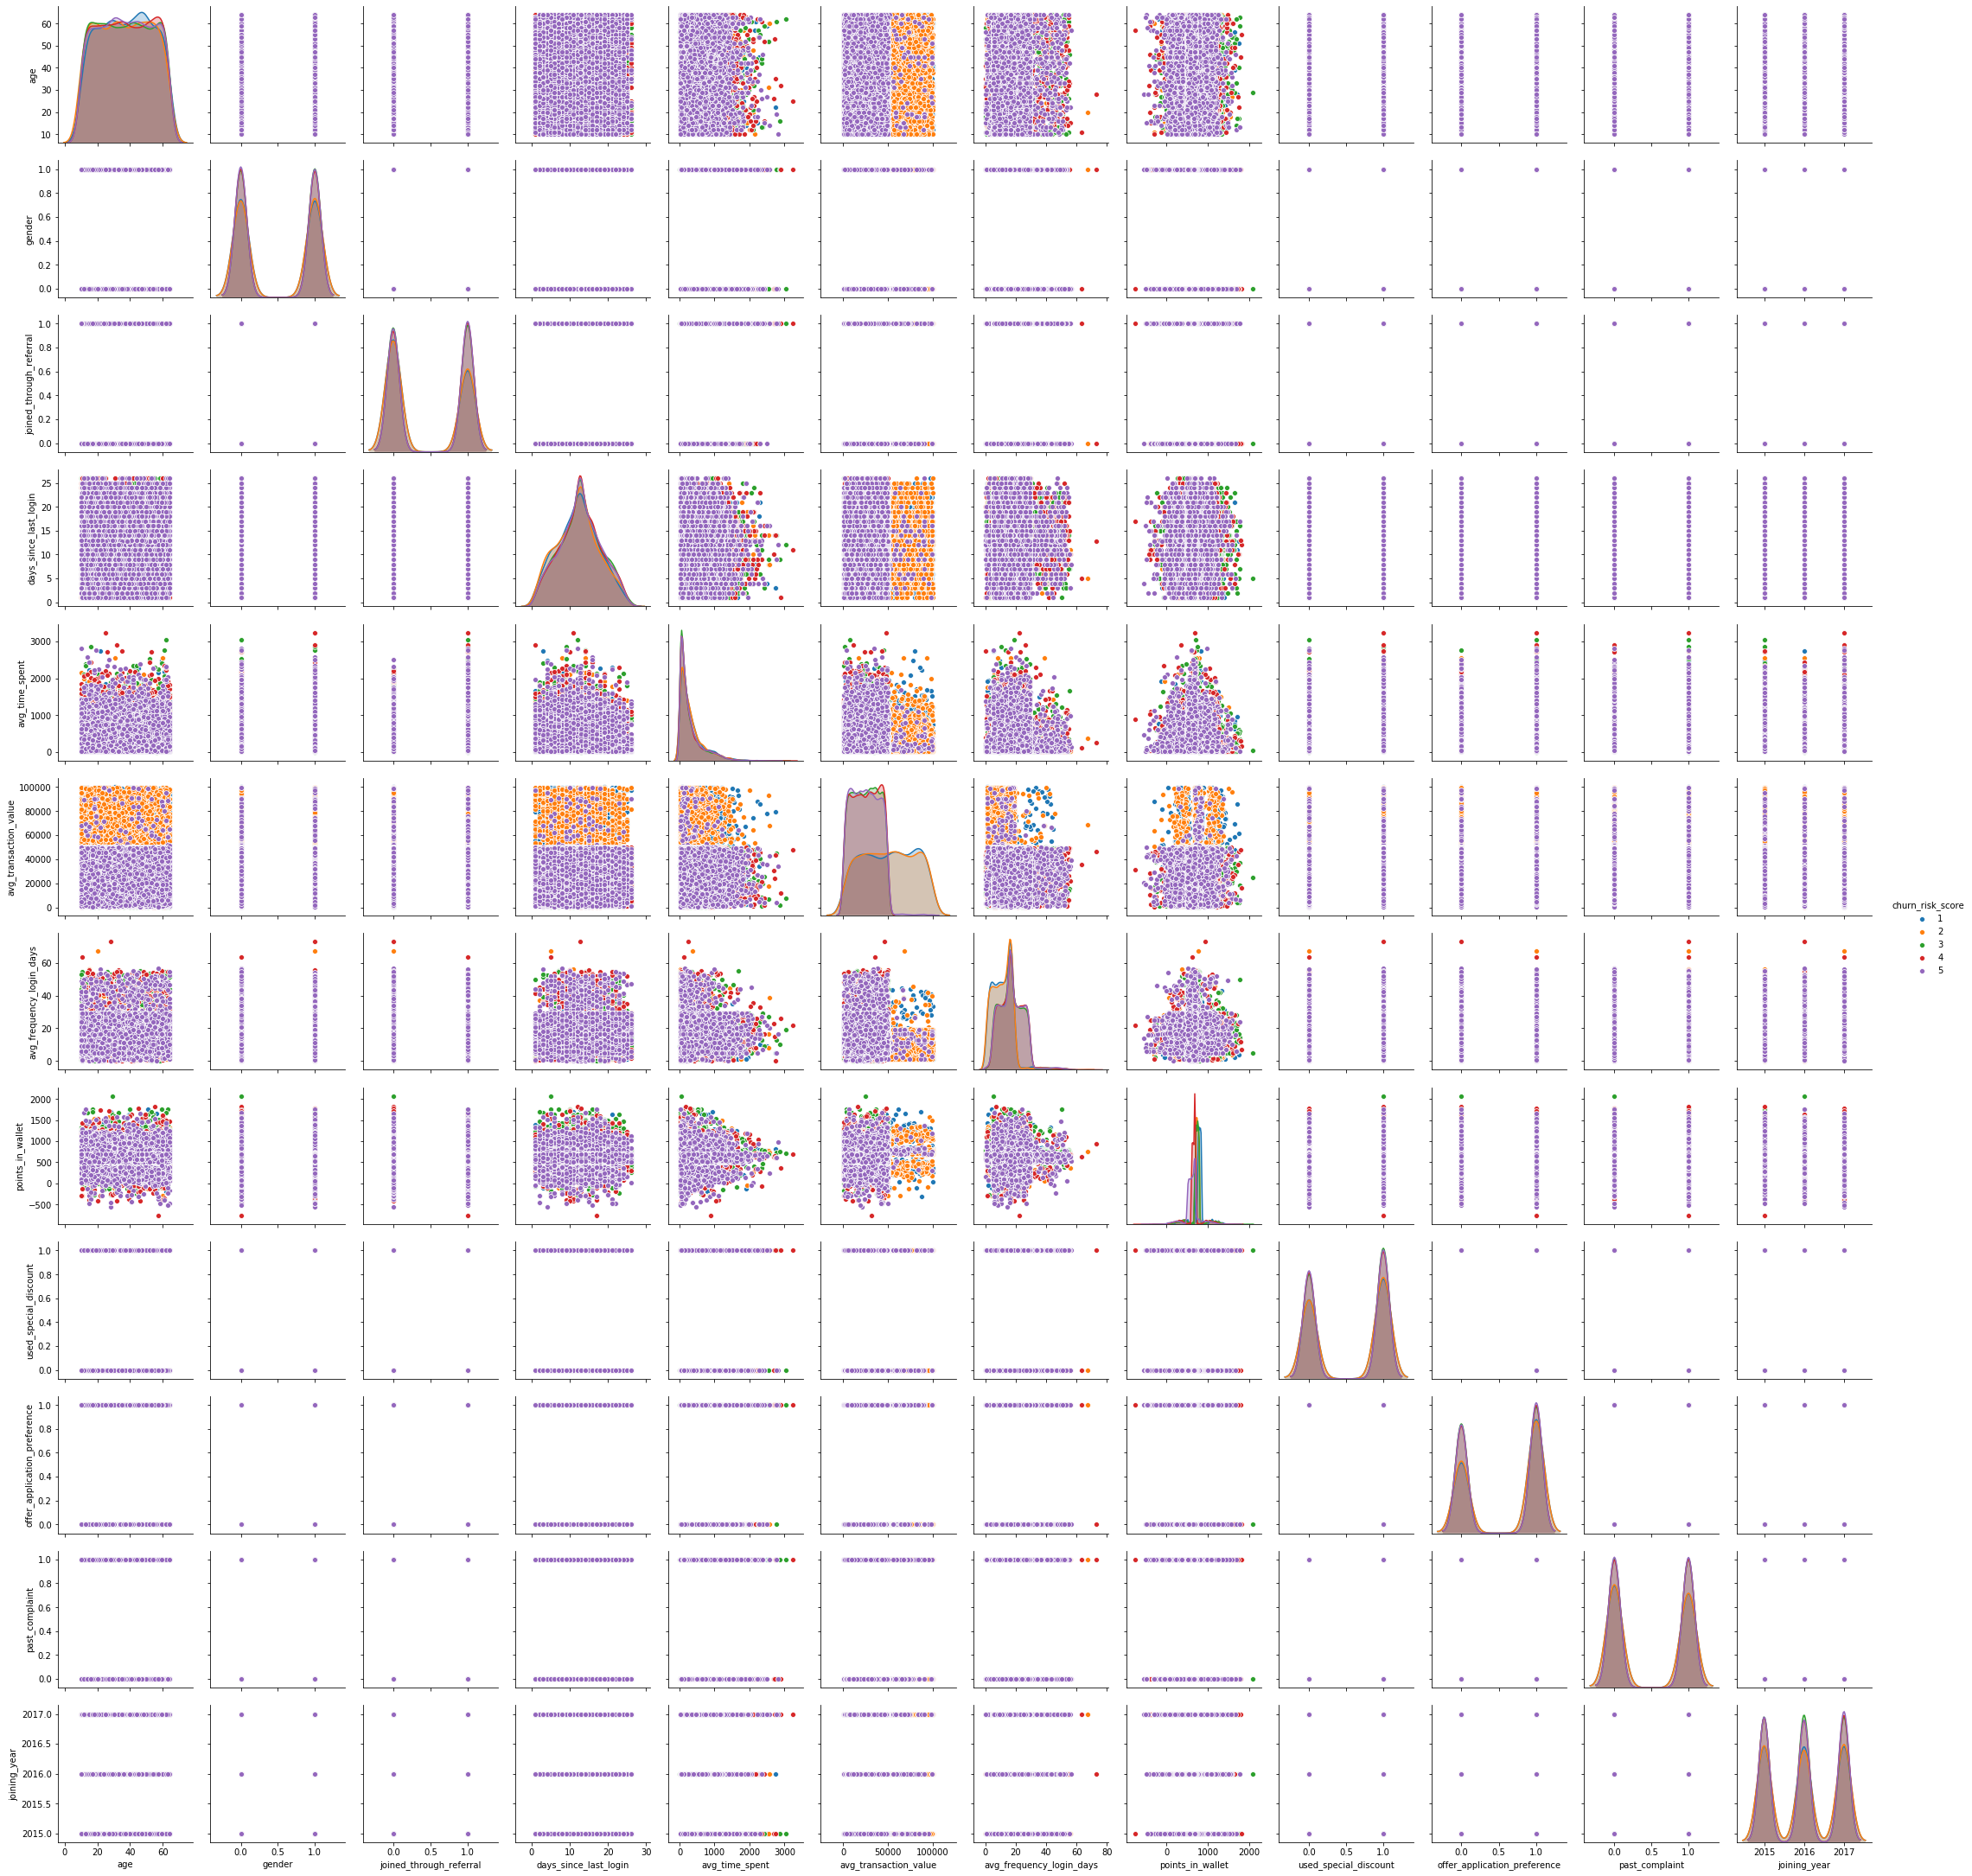

In [28]:
sns.pairplot(df_train, hue = 'churn_risk_score')
plt.show()

In [52]:
df_train = pd.get_dummies(df_train,columns=['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status'],drop_first=True)

In [53]:
df_train.columns

Index(['customer_id', 'Name', 'age', 'gender', 'security_no',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'feedback',
       'churn_risk_score', 'joining_year', 'region_category_Town',
       'region_category_Village',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'complaint_status_Not Applicable',
       'complaint_status_Solved', 'complaint_status_Solved in Follow-up',
       'complaint_status_Unsolved'],
      dtype='object')

In [55]:
df_train.corr()['churn_risk_score']

age                                            0.002160
gender                                        -0.004682
joined_through_referral                        0.051414
days_since_last_login                          0.030453
avg_time_spent                                -0.021831
avg_transaction_value                         -0.352300
avg_frequency_login_days                       0.206386
points_in_wallet                              -0.299573
used_special_discount                         -0.011559
offer_application_preference                  -0.033345
past_complaint                                 0.011111
churn_risk_score                               1.000000
joining_year                                   0.006095
region_category_Town                           0.007976
region_category_Village                       -0.032176
preferred_offer_types_Gift Vouchers/Coupons   -0.056479
preferred_offer_types_Without Offers           0.057523
medium_of_operation_Desktop                   -0

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   customer_id                                  36992 non-null  object        
 1   Name                                         36992 non-null  object        
 2   age                                          36992 non-null  int64         
 3   gender                                       36992 non-null  int64         
 4   security_no                                  36992 non-null  object        
 5   membership_category                          36992 non-null  int64         
 6   joining_date                                 36992 non-null  datetime64[ns]
 7   joined_through_referral                      36992 non-null  int64         
 8   referral_id                                  19146 non-null  object        


In [29]:
df_train.corr().churn_risk_score

age                                            0.002160
gender                                        -0.004682
membership_category                           -0.425258
joined_through_referral                        0.051414
days_since_last_login                          0.030453
avg_time_spent                                -0.021831
avg_transaction_value                         -0.352300
avg_frequency_login_days                       0.206386
points_in_wallet                              -0.299573
used_special_discount                         -0.011559
offer_application_preference                  -0.033345
past_complaint                                 0.011111
feedback                                      -0.324834
churn_risk_score                               1.000000
joining_year                                   0.006095
region_category_Town                           0.007976
region_category_Village                       -0.032176
preferred_offer_types_Gift Vouchers/Coupons   -0

In [62]:
df_train.corr().churn_risk_score

age                                            0.002314
gender                                        -0.003944
membership_category                           -0.433369
joined_through_referral                        0.051262
days_since_last_login                          0.030023
avg_time_spent                                -0.022995
avg_transaction_value                         -0.357921
avg_frequency_login_days                       0.209172
points_in_wallet                              -0.305696
used_special_discount                         -0.011062
offer_application_preference                  -0.034686
past_complaint                                 0.011807
feedback                                      -0.329962
churn_risk_score                               1.000000
joining_year                                   0.006975
region_category_Town                           0.008554
region_category_Village                       -0.032213
preferred_offer_types_Gift Vouchers/Coupons   -0

In [53]:
df_train.corr().churn_risk_score

age                                            0.002419
gender                                        -0.003105
membership_category                           -0.431922
joined_through_referral                        0.049959
days_since_last_login                          0.028914
avg_time_spent                                -0.023664
avg_transaction_value                         -0.355630
avg_frequency_login_days                       0.207325
points_in_wallet                              -0.305084
used_special_discount                         -0.010309
offer_application_preference                  -0.035273
past_complaint                                 0.012251
feedback                                      -0.327795
churn_risk_score                               1.000000
joining_year                                   0.007714
region_category_Town                           0.008950
region_category_Village                       -0.031529
preferred_offer_types_Gift Vouchers/Coupons   -0

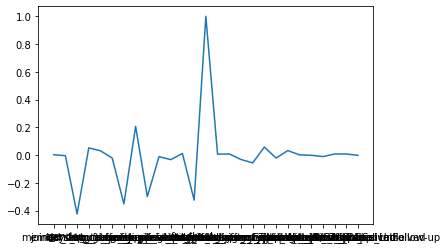

In [65]:
plt.plot(df_train.corr().churn_risk_score)

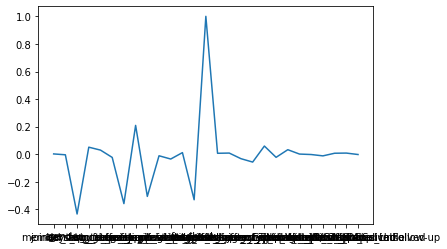

In [63]:
plt.plot(df_train.corr().churn_risk_score)

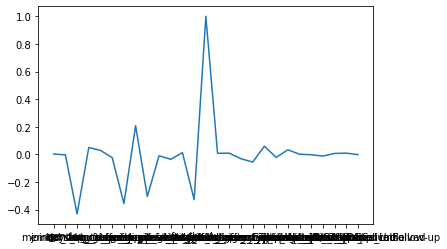

In [60]:
plt.plot(df_train.corr().churn_risk_score)

In [35]:
df_test = pd.read_csv('./dataset/test.csv',na_values=['xxxxxxxx','Unknown','?',-999])
df_test

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,NaN,...,12.0,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,NaN,...,11.0,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,NaN,...,18.0,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,...,NaN,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,...,6.0,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,fffe43004900440035003600330037003800,Kraig Peele,12,M,2V0HA0O,NaN,Gold Membership,2015-01-25,No,NaN,...,16.0,103.57,46279.35,18.0,708.120000,No,Yes,No,Not Applicable,Poor Product Quality
19915,fffe43004900440032003900370037003100,Damaris Sabol,40,F,VJGQD6Q,Village,No Membership,2017-12-31,Yes,CID45490,...,21.0,63.19,23466.26,Error,574.340000,No,Yes,No,Not Applicable,No reason specified
19916,fffe43004900440036003100310036003700,Loura Huckstep,55,M,ADE7LWA,Town,No Membership,2015-09-09,No,NaN,...,18.0,68.72,17903.75,24.0,564.300000,No,Yes,Yes,Unsolved,No reason specified
19917,fffe43004900440034003200330033003600,Sharita Clubb,17,F,A35KUBS,City,Silver Membership,2016-04-17,Yes,CID37167,...,3.0,119.54,14057.09,22.0,606.340000,No,Yes,No,Not Applicable,Poor Website


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   19919 non-null  object 
 1   Name                          19919 non-null  object 
 2   age                           19919 non-null  int64  
 3   gender                        19883 non-null  object 
 4   security_no                   19919 non-null  object 
 5   region_category               16971 non-null  object 
 6   membership_category           19919 non-null  object 
 7   joining_date                  19919 non-null  object 
 8   joined_through_referral       16921 non-null  object 
 9   referral_id                   10465 non-null  object 
 10  preferred_offer_types         19760 non-null  object 
 11  medium_of_operation           16955 non-null  object 
 12  internet_option               19919 non-null  object 
 13  l

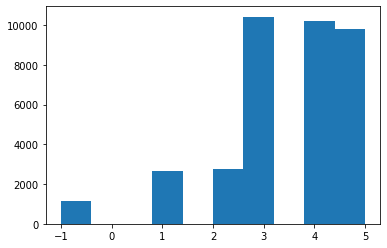

In [48]:
plt.hist(df_train.churn_risk_score)
plt.show()

## Trying SMOTE

In [100]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, SMOTENC, ADASYN, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE

x = df_train.drop(['customer_id','Name','security_no','referral_id','churn_risk_score','joining_date','last_visit_time'], axis=1)
y = df_train['churn_risk_score']

oversampler = SMOTE()
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

oversampler = SMOTENC([1,2,3,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25])
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

oversampler = ADASYN()
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

oversampler = BorderlineSMOTE()
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

oversampler = SVMSMOTE()
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

oversampler = KMeansSMOTE()
x, y = oversampler.fit_resample(x,y)
x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

              precision    recall  f1-score   support

           1       0.55      0.53      0.54      3405
           2       0.52      0.57      0.54      3404
           3       0.60      0.55      0.57      3404
           4       0.30      0.17      0.22      3405
           5       0.49      0.72      0.59      3404

    accuracy                           0.51     17022
   macro avg       0.49      0.51      0.49     17022
weighted avg       0.49      0.51      0.49     17022

0.5078721654329691
              precision    recall  f1-score   support

           1       0.57      0.46      0.51      3404
           2       0.49      0.63      0.55      3405
           3       0.56      0.63      0.59      3404
           4       0.34      0.11      0.16      3405
           5       0.47      0.70      0.57      3404

    accuracy                           0.51     17022
   macro avg       0.49      0.51      0.48     17022
weighted avg       0.49      0.51      0.48     17022

0.5

In [101]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

x = df_train.drop(['customer_id','Name','security_no','referral_id','churn_risk_score','joining_date','last_visit_time'], axis=1)
y = df_train['churn_risk_score']

oversampler = SMOTE()
x, y = oversampler.fit_resample(x,y)

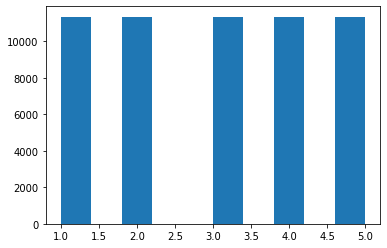

In [102]:
plt.hist(y)
plt.show()

## Trying different classifiers

In [103]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)
log_model_ss = make_pipeline(StandardScaler(),LogisticRegression())
log_model_ss.fit(x_train,y_train)
y_pred = log_model_ss.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

log_model_rs = make_pipeline(RobustScaler(),LogisticRegression())
log_model_rs.fit(x_train,y_train)
y_pred = log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

log_model_ms = make_pipeline(MinMaxScaler(),LogisticRegression())
log_model_ms.fit(x_train,y_train)
y_pred = log_model_ms.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))


sgd_log_model_ss = make_pipeline(StandardScaler(),SGDClassifier(loss='log'))
sgd_log_model_ss.fit(x_train,y_train)
y_pred = sgd_log_model_ss.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

sgd_log_model_rs = make_pipeline(RobustScaler(),SGDClassifier(loss='log'))
sgd_log_model_rs.fit(x_train,y_train)
y_pred = sgd_log_model_rs.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

sgd_log_model_ms = make_pipeline(MinMaxScaler(),SGDClassifier(loss='log'))
sgd_log_model_ms.fit(x_train,y_train)
y_pred = sgd_log_model_ms.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

              precision    recall  f1-score   support

           1       0.56      0.55      0.56      3405
           2       0.54      0.57      0.55      3404
           3       0.60      0.60      0.60      3404
           4       0.33      0.28      0.30      3404
           5       0.50      0.55      0.53      3405

    accuracy                           0.51     17022
   macro avg       0.51      0.51      0.51     17022
weighted avg       0.51      0.51      0.51     17022

0.5111620256139114


/Users/nilavanakilan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.56      0.55      0.56      3405
           2       0.54      0.57      0.55      3404
           3       0.60      0.60      0.60      3404
           4       0.33      0.28      0.30      3404
           5       0.50      0.55      0.53      3405

    accuracy                           0.51     17022
   macro avg       0.51      0.51      0.51     17022
weighted avg       0.51      0.51      0.51     17022

0.5112207731171425


/Users/nilavanakilan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           1       0.56      0.55      0.55      3405
           2       0.54      0.57      0.55      3404
           3       0.59      0.60      0.60      3404
           4       0.33      0.28      0.30      3404
           5       0.50      0.56      0.53      3405

    accuracy                           0.51     17022
   macro avg       0.50      0.51      0.51     17022
weighted avg       0.50      0.51      0.51     17022

0.5105745505816003
              precision    recall  f1-score   support

           1       0.55      0.47      0.51      3405
           2       0.51      0.59      0.54      3404
           3       0.56      0.58      0.57      3404
           4       0.33      0.20      0.25      3404
           5       0.49      0.66      0.57      3405

    accuracy                           0.50     17022
   macro avg       0.49      0.50      0.49     17022
weighted avg       0.49      0.50      0.49     17022

0.5

In [117]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

x = df_train.drop(['customer_id','Name','security_no','referral_id','churn_risk_score','joining_date','last_visit_time'], axis=1)
y = df_train['churn_risk_score']

oversampler = SMOTE()
x, y = oversampler.fit_resample(x,y)

x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,random_state=100,stratify = y)

dt_model_g = make_pipeline(RobustScaler(),DecisionTreeClassifier(class_weight='balanced'))
dt_model_g.fit(x_train,y_train)
y_pred = dt_model_g.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='macro'))

dt_model_e = make_pipeline(RobustScaler(),DecisionTreeClassifier(criterion='entropy',class_weight='balanced'))
dt_model_e.fit(x_train,y_train)
y_pred = dt_model_e.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='macro'))

rf_model_g = make_pipeline(RobustScaler(),RandomForestClassifier(class_weight='balanced'))
rf_model_g.fit(x_train,y_train)
y_pred = rf_model_g.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='macro'))

rf_model_e = make_pipeline(RobustScaler(),RandomForestClassifier(criterion='entropy',class_weight='balanced'))
rf_model_e.fit(x_train,y_train)
y_pred = rf_model_e.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='macro'))

              precision    recall  f1-score   support

           1       0.76      0.76      0.76      3405
           2       0.74      0.76      0.75      3404
           3       0.84      0.83      0.84      3404
           4       0.61      0.62      0.61      3404
           5       0.73      0.72      0.73      3405

    accuracy                           0.74     17022
   macro avg       0.74      0.74      0.74     17022
weighted avg       0.74      0.74      0.74     17022

0.7364386771454188
              precision    recall  f1-score   support

           1       0.77      0.75      0.76      3405
           2       0.75      0.77      0.76      3404
           3       0.85      0.83      0.84      3404
           4       0.60      0.62      0.61      3404
           5       0.73      0.72      0.73      3405

    accuracy                           0.74     17022
   macro avg       0.74      0.74      0.74     17022
weighted avg       0.74      0.74      0.74     17022

0.7

In [18]:
rf_model_e = make_pipeline(RobustScaler(),RandomForestClassifier(criterion='entropy',class_weight='balanced'))
rf_model_e.fit(x_train,y_train)
y_pred = rf_model_e.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

rf_model_s = make_pipeline(RobustScaler(),RandomForestClassifier(criterion='entropy',class_weight='balanced_subsample'))
rf_model_s.fit(x_train,y_train)
y_pred = rf_model_s.predict(x_cv)
print(classification_report(y_cv,y_pred))
print(f1_score(y_cv,y_pred,average='micro'))

              precision    recall  f1-score   support

           1       0.85      0.84      0.85      3405
           2       0.83      0.86      0.84      3404
           3       0.88      0.88      0.88      3404
           4       0.70      0.58      0.64      3404
           5       0.73      0.83      0.78      3405

    accuracy                           0.80     17022
   macro avg       0.80      0.80      0.80     17022
weighted avg       0.80      0.80      0.80     17022

0.7989072964399013
              precision    recall  f1-score   support

           1       0.85      0.84      0.84      3405
           2       0.82      0.86      0.84      3404
           3       0.87      0.88      0.88      3404
           4       0.70      0.58      0.64      3404
           5       0.73      0.83      0.78      3405

    accuracy                           0.80     17022
   macro avg       0.80      0.80      0.79     17022
weighted avg       0.80      0.80      0.79     17022

0.7

In [ ]:
from sklearn.model_selection import RandomizedSearchCV



# full code

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
    
df_train = pd.read_csv('./dataset/train.csv',na_values=['xxxxxxxx','Unknown','?',-999])
df_train.avg_frequency_login_days = abs(pd.to_numeric(df_train.avg_frequency_login_days,errors='coerce'))
df_train.churn_risk_score = df_train.churn_risk_score.replace(-1,4)
df_train.medium_of_operation = df_train.medium_of_operation.fillna(value='Both')
df_train.gender = df_train.gender.fillna('F')
df_train.avg_time_spent = abs(df_train.avg_time_spent)

df_test = pd.read_csv('./dataset/test.csv',na_values=['xxxxxxxx','Unknown','?',-999])
df_test.avg_frequency_login_days = abs(pd.to_numeric(df_test.avg_frequency_login_days,errors='coerce'))
df_test.medium_of_operation = df_test.medium_of_operation.fillna(value='Both')
df_test.gender = df_test.gender.fillna('F')
df_test.avg_time_spent = abs(df_test.avg_time_spent)


cols_nan = ['region_category','joined_through_referral','preferred_offer_types','days_since_last_login','avg_frequency_login_days','points_in_wallet']
for col in cols_nan:
    if df_train[col].dtype == 'float64':
        df_train[col] = df_train[col].fillna(df_train[col].mean())
        df_test[col] = df_test[col].fillna(df_test[col].mean())
    else:
        df_train[col] = df_train[col].fillna(method='ffill') 
        df_test[col] = df_test[col].fillna(method='ffill') 
        

df_train.points_in_wallet = abs(df_train.points_in_wallet)   
df_test.points_in_wallet = abs(df_test.points_in_wallet)
        
df_train.joining_date = pd.to_datetime(df_train.joining_date)
df_train['joining_year'] = df_train.joining_date.dt.year
df_train['joining_month'] = df_train.joining_date.dt.month
df_train['joining_day'] = df_train.joining_date.dt.day

df_test.joining_date = pd.to_datetime(df_test.joining_date)
df_test['joining_year'] = df_test.joining_date.dt.year
df_test['joining_month'] = df_test.joining_date.dt.month
df_test['joining_day'] = df_test.joining_date.dt.day

le = preprocessing.LabelEncoder()

le_cols = ['gender','used_special_discount','offer_application_preference','past_complaint','joined_through_referral','membership_category','feedback']

for col in le_cols:
    df_train[col] = le.fit_transform(df_train[col])
    df_test[col] = le.fit_transform(df_test[col])

one_hot_cols = ['region_category','preferred_offer_types','medium_of_operation','internet_option','complaint_status']

df_train = pd.get_dummies(df_train,columns=one_hot_cols,drop_first=True)
df_test = pd.get_dummies(df_test,columns=one_hot_cols,drop_first=True)

cols_to_drop = ['customer_id','Name','security_no','referral_id','joining_date','last_visit_time']
df_train.drop(cols_to_drop,axis=1,inplace=True)
x = df_train.drop(['churn_risk_score'], axis=1)
y = df_train['churn_risk_score']
x_test = df_test.drop(cols_to_drop, axis=1)

x_train, x_cv, y_train, y_cv = train_test_split(x,y,train_size = 0.7,stratify = y)

rf_model = make_pipeline(RobustScaler(),RandomForestClassifier(n_estimators=250,max_depth=60,criterion='entropy',class_weight='balanced_subsample'))
rf_model.fit(x_train,y_train)
y_pred_1 = rf_model.predict(x_cv)
print(classification_report(y_cv,y_pred_1))
print(f1_score(y_cv,y_pred_1,average='micro'))

xgb_model = make_pipeline(RobustScaler(),XGBClassifier(colsample_bytree=0.7, gamma=0.4, max_depth=4, min_child_weight=3, n_estimators=119, objective='multi:softprob'))
xgb_model.fit(x_train,y_train)
y_pred_2 = xgb_model.predict(x_cv)
print(classification_report(y_cv,y_pred_2))
print(f1_score(y_cv,y_pred_2,average='micro'))

              precision    recall  f1-score   support

           1       0.72      0.75      0.73       796
           2       0.75      0.74      0.74       822
           3       0.87      0.90      0.88      3127
           4       0.67      0.58      0.62      3405
           5       0.70      0.78      0.74      2948

    accuracy                           0.75     11098
   macro avg       0.74      0.75      0.74     11098
weighted avg       0.74      0.75      0.74     11098

0.7474319697242746
              precision    recall  f1-score   support

           1       0.70      0.90      0.79       796
           2       0.85      0.66      0.74       822
           3       0.89      0.89      0.89      3127
           4       0.72      0.55      0.62      3405
           5       0.69      0.86      0.76      2948

    accuracy                           0.76     11098
   macro avg       0.77      0.77      0.76     11098
weighted avg       0.77      0.76      0.76     11098

0.7

In [58]:
'''rf_model.fit(x,y)
xgb_model.fit(x,y)
result1 = rf_model.predict(x_test)
probs1 = 
result2 = xgb_model.predict(x_test)'''
xgb_model.fit(x,y)
result = xgb_model.predict(x_test)
submission = pd.DataFrame({
    'customer_id': df_test['customer_id'],
    'churn_risk_score': result,
})

print(submission['churn_risk_score'].value_counts())

submission.to_csv('sub40.csv', index=False)

5    6373
4    5405
3    5138
1    1981
2    1022
Name: churn_risk_score, dtype: int64


In [7]:
rf_model.predict_proba(x_test)

array([[0.  , 0.01, 0.92, 0.06, 0.01],
       [0.  , 0.  , 0.81, 0.17, 0.02],
       [0.  , 0.  , 0.64, 0.36, 0.  ],
       ...,
       [0.  , 0.  , 0.01, 0.14, 0.85],
       [0.  , 0.  , 0.08, 0.9 , 0.02],
       [0.21, 0.05, 0.59, 0.13, 0.02]])

In [8]:
xgb_model.predict_proba(x_test)

array([[3.21313099e-04, 1.15890300e-03, 9.79319036e-01, 1.88493077e-02,
        3.51384515e-04],
       [5.50307508e-04, 1.96024589e-03, 9.49442565e-01, 4.70568761e-02,
        9.90057131e-04],
       [2.99295614e-04, 6.33282878e-04, 4.68974143e-01, 5.29638886e-01,
        4.54368652e-04],
       ...,
       [1.79994458e-04, 1.95530141e-04, 7.34554545e-04, 3.02177891e-02,
        9.68672156e-01],
       [1.70118394e-04, 3.26786685e-04, 1.13637997e-02, 9.86322522e-01,
        1.81672070e-03],
       [1.15711978e-02, 5.02322009e-03, 8.80072117e-01, 1.00802295e-01,
        2.53119902e-03]], dtype=float32)

In [17]:
rf_model.predict(x_test)

array([3, 3, 3, ..., 5, 4, 3])

In [16]:
xgb_model.predict(x_test)

array([3, 3, 4, ..., 5, 4, 3])

In [15]:
fig = plt.figure(figsize=(6, 6))
ax= plt.subplot(121)
cm = confusion_matrix(y_true=y_cv,y_pred=y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g')
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

/Users/nilavanakilan/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:704: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[       -inf, -4.60517019, -0.08338161, -2.81341072, -4.60517019],
       [       -inf,        -inf, -0.21072103, -1.77195684, -3.91202301],
       [       -inf,        -inf, -0.4462871 , -1.02165125,        -inf],
       ...,
       [       -inf,        -inf, -4.60517019, -1.96611286, -0.16251893],
       [       -inf,        -inf, -2.52572864, -0.10536052, -3.91202301],
       [-1.56064775, -2.99573227, -0.52763274, -2.04022083, -3.91202301]])

In [59]:
df_train.corr().churn_risk_score

age                                            0.002314
gender                                        -0.003944
membership_category                           -0.433369
joined_through_referral                        0.051262
days_since_last_login                          0.030023
avg_time_spent                                -0.022995
avg_transaction_value                         -0.357921
avg_frequency_login_days                       0.209172
points_in_wallet                              -0.310631
used_special_discount                         -0.011062
offer_application_preference                  -0.034686
past_complaint                                 0.011807
feedback                                      -0.329962
churn_risk_score                               1.000000
joining_year                                   0.006975
joining_month                                  0.008430
joining_day                                    0.007836
region_category_Town                           0

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = make_pipeline(RobustScaler(),KNeighborsClassifier(n_neighbors=6000))
knn_model.fit(x_train,y_train)
y_pred_3 = knn_model.predict(x_cv)
print(classification_report(y_cv,y_pred_3))
print(f1_score(y_cv,y_pred_3,average='micro'))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       796
           2       0.00      0.00      0.00       822
           3       0.49      0.70      0.58      3127
           4       0.45      0.60      0.51      3405
           5       0.62      0.46      0.52      2948

    accuracy                           0.50     11098
   macro avg       0.31      0.35      0.32     11098
weighted avg       0.44      0.50      0.46     11098

0.5010812759055686


/Users/nilavanakilan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
df_train.shape

(36992, 29)

In [66]:
36992/5

7398.4

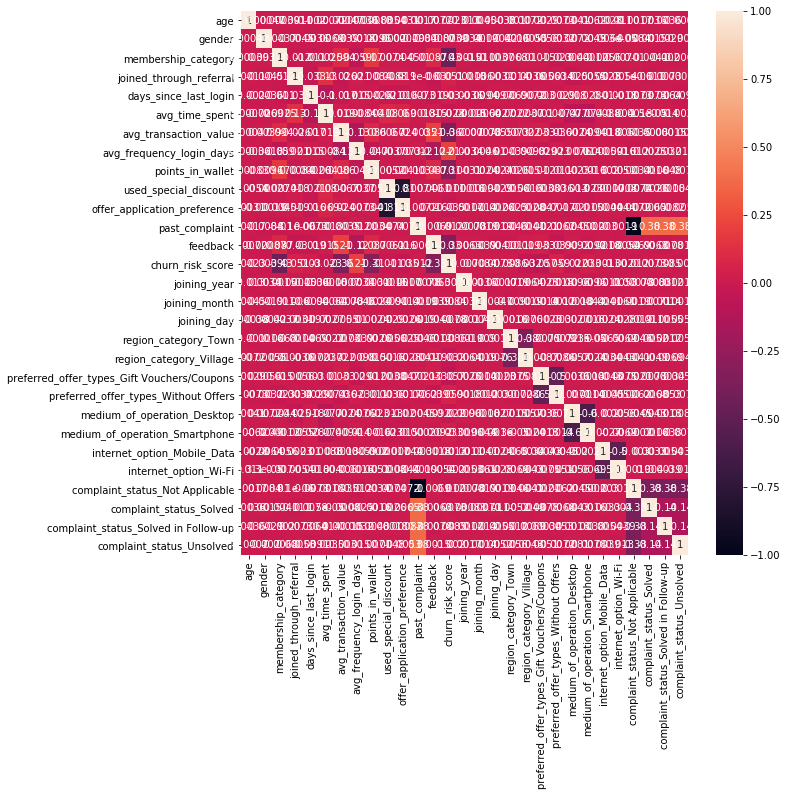

In [70]:
plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(),annot=True)
plt.show()